# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Simon Yuen\
**Email:** scy3443@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

> TODO

1. We can split the initial dataset into a training set of 70 speakers, which will give us 70,000 recordings. Then our validation and test sets can have 15 speakers each, giving us 15,000 recording each. When splitting the data, we cant to ensure there is no speaker overlap between splits, which will force the model to learn speaker-independent features. Additionally, we have to make sure that the 44 phones are well-represented in each set. This will help make sure our model generalizes to new speakers.

2. In order to train a model that performs specifically well for Kilian whilst maintaining generalization, we can use a mix of data from the initial dataset and the Kilian dataset. We can split each dataset into 70/15/15 splits in the same fashion as we did in step 1. Then, we can combine the Kilian training data with the initial training data. In order to make sure the model performs particularly well for Kilian, we can oversample the Kilian data by a factor of 3-5x. This oversampling makes sure we see Kilian's data frequently enough to specialize. Then, we can test on both test sets to ensure we get the proper performance.

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


> TODO

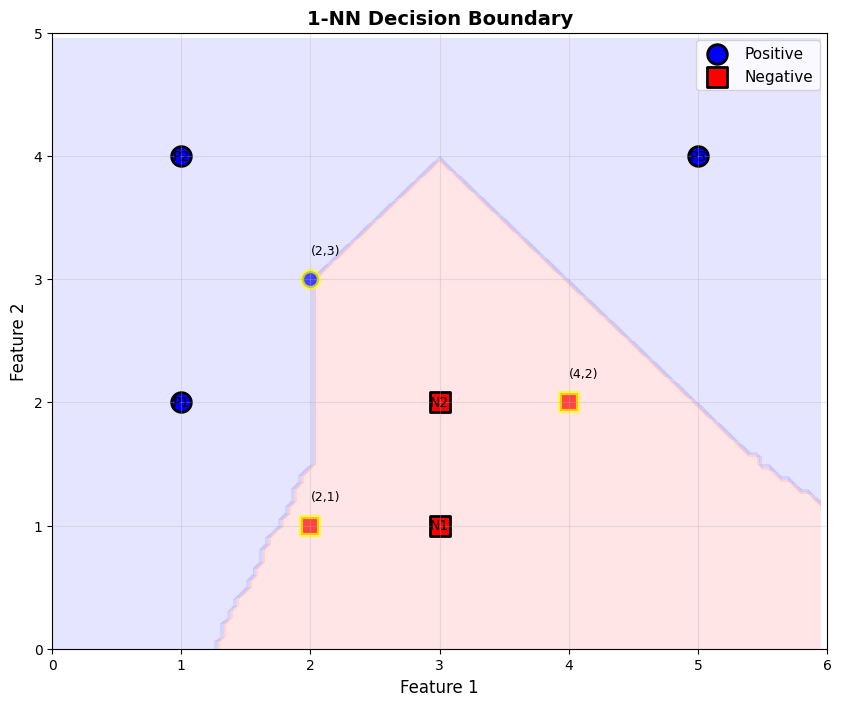

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Training data
positive = np.array([[1,2], [1,4], [5,4]])
negative = np.array([[3,1], [3,2]])

# Combine all training data
X_train = np.vstack([positive, negative])
y_train = np.array([1, 1, 1, 0, 0])  # 1 for positive, 0 for negative

# Create a mesh grid to visualize decision boundary
x_min, x_max = 0, 6
y_min, y_max = 0, 5
h = 0.05  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Classify each point in the mesh using 1-NN
mesh_points = np.c_[xx.ravel(), yy.ravel()]
predictions = []

for point in mesh_points:
    # Calculate distances to all training points
    distances = np.sqrt(np.sum((X_train - point)**2, axis=1))
    # Find nearest neighbor
    nearest_idx = np.argmin(distances)
    predictions.append(y_train[nearest_idx])

predictions = np.array(predictions).reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 8))

# Plot decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.contourf(xx, yy, predictions, alpha=0.3, cmap=cmap_light)

# Plot training points
plt.scatter(positive[:, 0], positive[:, 1], c='blue', s=200, 
           marker='o', edgecolors='k', linewidth=2, label='Positive')
plt.scatter(negative[:, 0], negative[:, 1], c='red', s=200, 
           marker='s', edgecolors='k', linewidth=2, label='Negative')

# Add labels for training points
for i, point in enumerate(positive):
    plt.annotate(f'P{i+1}', (point[0], point[1]), 
                fontsize=10, ha='center', va='center')
for i, point in enumerate(negative):
    plt.annotate(f'N{i+1}', (point[0], point[1]), 
                fontsize=10, ha='center', va='center')

test_points = np.array([[2, 3], [4, 2], [2, 1]])
for test_point in test_points:
    distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
    nearest_idx = np.argmin(distances)
    color = 'blue' if y_train[nearest_idx] == 1 else 'red'
    marker = 'o' if y_train[nearest_idx] == 1 else 's'
    plt.scatter(test_point[0], test_point[1], c=color, s=150, 
               marker=marker, edgecolors='yellow', linewidth=3, alpha=0.7)
    plt.annotate(f'({test_point[0]},{test_point[1]})', 
                (test_point[0], test_point[1]+0.2), fontsize=9)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('1-NN Decision Boundary', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

2. Before scaling, the 1-NN would classify it as positive. After scaling to [0, 1] per feature, the 1-NN would classify it as negative.
3. In order to handle missing features in a test point, we could compute distance with only the non-missing features common to both points. We could also fill in the missing values with the mean/median fo the training set.
4. K-NN can still work well for images even with thousands of pixels because similar objects usually have similar pixel patterns. Additionally, images of the same class typically cluster together in feature space, depsite high dimensionality and since many pixels are correlated, the effective dimensionality is usually much lower than the nominal dimensionality.

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

> TODO

1. Yes, it helps to determine whether test error is higher than training error because we are directly computing the training error which is the fraction of examples in D_TR where sign(w . x) does not equal y. And the test error which is the fraction of examples in D_TE where sign(w . x) does not equal y.

2. There is no need to compute training error explicitly because the perceptron algorithm only updates weights when it makes a mistake and stops when it makes a complete pass through D_TR with no mistakes. Therefore, when the perceptron converges, the training error is guaranteed to be zero.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

> TODO

Iteration 1:

w₀ = (0, 0)

Check x₁: w₀ · x₁ = 0 → misclassified → w₁ = (0,0) + 1·(+1)·(10,-2) = (10, -2)

Check x₂: w₁ · x₂ = 120 - 4 = 116 > 0 → predicts +1, but y₂ = -1 → w₂ = (10,-2) + 1·(-1)·(12,2) = (-2, -4)

Iteration 2:

Check x₁: w₂ · x₁ = -20 + 8 = -12 < 0 → predicts -1, wrong → w₃ = (-2,-4) + (10,-2) = (8, -6)

Check x₂: w₃ · x₂ = 96 - 12 = 84 > 0 → wrong → w₄ = (8,-6) + (-12,-2) = (-4, -8)

Iteration 3:

Check x₁: w₄ · x₁ = -40 + 16 = -24 < 0 → wrong → w₅ = (-4,-8) + (10,-2) = (6, -10)

Check x₂: w₅ · x₂ = 72 - 20 = 52 > 0 → wrong → w₆ = (6,-10) + (-12,-2) = (-6, -12)

Iteration 4:

Check x₁: w₆ · x₁ = -60 + 24 = -36 < 0 → wrong → w₇ = (-6,-12) + (10,-2) = (4, -14)

Check x₂: w₇ · x₂ = 48 - 28 = 20 > 0 → wrong → w₈ = (4,-14) + (-12,-2) = (-8, -16)

Iteration 5:

Check x₁: w₈ · x₁ = -80 + 32 = -48 < 0 → wrong → w₉ = (-8,-16) + (10,-2) = (2, -18)

Check x₂: w₉ · x₂ = 24 - 36 = -12 < 0 → predicts -1

Iteration 6 (verification):

Check x₁: w₉ · x₁ = 20 + 36 = 56 > 0 → predicts +1
Check x₂: w₉ · x₂ = -12 < 0 → predicts -1

Converged after 9 weight updates

### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

> TODO

Final weight vector: w = (−3, −10, 3, −3, 3)

### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

Converged after 2 epochs and 1 updates
Final weights: [0.1        0.24967142 0.18617357]


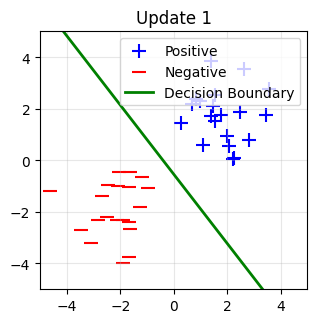

In [6]:
#TODO

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_pos = np.random.randn(20, 2) + np.array([2, 2])
X_neg = np.random.randn(20, 2) + np.array([-2, -2])
X = np.vstack([X_pos, X_neg])
y = np.array([1]*20 + [-1]*20)

X_bias = np.c_[np.ones(X.shape[0]), X]

w = np.zeros(3)
learning_rate = 0.1
max_epochs = 20

fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.flatten()
update_count = 0

for epoch in range(max_epochs):
    errors = 0
    for i in range(len(X)):
        if y[i] * np.dot(w, X_bias[i]) <= 0:
            w += learning_rate * y[i] * X_bias[i]
            errors += 1
            
            if update_count < 20:
                ax = axes[update_count]
                ax.scatter(X_pos[:, 0], X_pos[:, 1], c='blue', marker='+', s=100, label='Positive')
                ax.scatter(X_neg[:, 0], X_neg[:, 1], c='red', marker='_', s=100, label='Negative')
                
                if w[2] != 0:
                    x_line = np.linspace(-5, 5, 100)
                    y_line = -(w[0] + w[1] * x_line) / w[2]
                    ax.plot(x_line, y_line, 'g-', linewidth=2, label='Decision Boundary')
                
                ax.set_xlim(-5, 5)
                ax.set_ylim(-5, 5)
                ax.set_title(f'Update {update_count + 1}')
                ax.grid(True, alpha=0.3)
                if update_count == 0:
                    ax.legend()
                
                update_count += 1
    
    if errors == 0:
        print(f"Converged after {epoch + 1} epochs and {update_count} updates")
        break

for i in range(update_count, 20):
    fig.delaxes(axes[i])

plt.tight_layout()
print(f"Final weights: {w}")